##ENUNCIADO

<p>La base de datos que utilizaran la deberán descargar de internet mediante el método que utilizamos en clases u cualquier otro que crean oportuno. Van a realizar un reentrenamiento de una red neuronal mediante transfer Learning, agregando la ultima capa de la red para una clasificación de las clases que decidan.
El objetivo del trabajo practico es aplicar los conocimientos de clasificación de imágenes por visión de computadora para un dataset recolectado por ustedes. Por lo que deberán realizar el trabajo de limpieza de imagenes (eliminar las que no correspondan para cada clase), y cada uno de los pasos hasta obtener el modelo en funcionamiento.</p>

##ACTIVIDADES
1. Armar la base de datos de las clases que queremos clasificar.
2. Realizar todas las transformaciones que creas necesarias (por ejemplo oversampling).
3. Elegir un modelo para aplicar transfer Learning (pueden utilizar el que hicimos en clase), tengan en cuenta que el modelo sea entrenado con datos similares a los que queremos predecir. Es decir si vamos a querer predecir perros o gatos, ver si la arquitectura fue entrenado con animales.
4. Elegir la función de activación para la arquitectura en base al problema (clasificación binaria o multiclase).
5. Definir una metrica que queremos medir para optimizar el modelo.
6. (opcional) Probar con 3 arquitecturas diferentes, y realizar la evaluación para cada uno de los modelos.
7. Realizar una predicción con una imagen x de internet con el mejor modelo desarrollado.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

%cd '/content/drive/MyDrive/diplo_DSA_2023'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/diplo_DSA_2023


In [3]:
!rm -r ./perros
!rm -r ./gatos

!rm -r ./datasetpg

# Creamos las carpetas para subir las imágenes

In [4]:
!mkdir perros
!mkdir gatos

# Descromprimir un archivo .zip en cada carpeta

In [5]:
%cd perros
!unzip /content/drive/MyDrive/diplo_DSA_2023/perros.zip
%cd ..

%cd gatos
!unzip /content/drive/MyDrive/diplo_DSA_2023/gatos.zip
%cd ..

/content/drive/MyDrive/diplo_DSA_2023/perros
Archive:  /content/drive/MyDrive/diplo_DSA_2023/perros.zip
   creating: perros/
  inflating: perros/dog.0.jpg        
  inflating: perros/dog.1.jpg        
  inflating: perros/dog.10.jpg       
  inflating: perros/dog.100.jpg      
  inflating: perros/dog.101.jpg      
  inflating: perros/dog.102.jpg      
  inflating: perros/dog.103.jpg      
  inflating: perros/dog.104.jpg      
  inflating: perros/dog.105.jpg      
  inflating: perros/dog.106.jpg      
  inflating: perros/dog.107.jpg      
  inflating: perros/dog.108.jpg      
  inflating: perros/dog.109.jpg      
  inflating: perros/dog.11.jpg       
  inflating: perros/dog.110.jpg      
  inflating: perros/dog.111.jpg      
  inflating: perros/dog.112.jpg      
  inflating: perros/dog.113.jpg      
  inflating: perros/dog.114.jpg      
  inflating: perros/dog.115.jpg      
  inflating: perros/dog.116.jpg      
  inflating: perros/dog.117.jpg      
  inflating: perros/dog.118.jpg      
 

In [6]:
!mv ./perros/perros/* ./perros
!mv ./gatos/gatos/* ./gatos

!rmdir ./perros/perros
!rmdir ./gatos/gatos

# Se visualiza la cantidad de imágenes por categoría

In [9]:
!ls ./perros/ | wc -l
!ls ./gatos/ | wc -l

200
200


# Se crean carpetas para set de datos

In [8]:
!mkdir datasetpg
!mkdir datasetpg/perros
!mkdir datasetpg/gatos

# Se copian las imágenes de cada categoría a las carpetas de dataset

In [10]:
import shutil
import os

source_folder = './perros'
target_folder = './datasetpg/perros'

images = os.listdir(source_folder)

for i, img_name in enumerate(images):
  if i < 200:
    shutil.copy(source_folder + "/" + img_name, target_folder + "/" + img_name)

source_folder = './gatos'
target_folder = './datasetpg/gatos'

images = os.listdir(source_folder)

for i, img_name in enumerate(images):
  if i < 200:
    shutil.copy(source_folder + "/" + img_name, target_folder + "/" + img_name)


# Se verifica la cantidad de imágenes en cada data sets

In [11]:
!ls /content/drive/MyDrive/diplo_DSA_2023/datasetpg/perros | wc -l
!ls /content/drive/MyDrive/diplo_DSA_2023/datasetpg/gatos | wc -l

200
200


# Se visualizan las imágenes

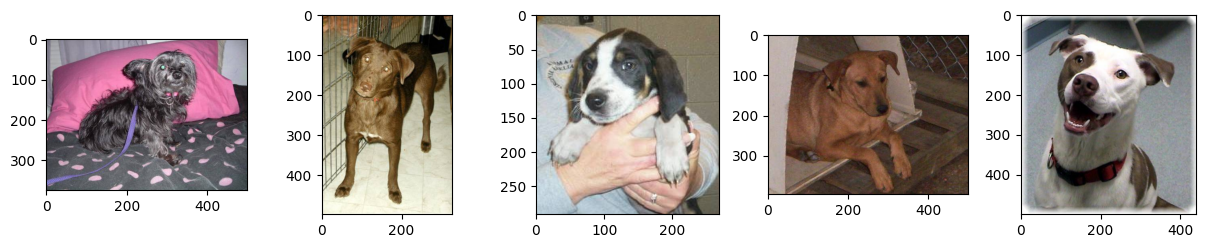

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15, 15))

folder = './datasetpg/perros'
images = os.listdir(folder)

for i, img_name in enumerate(images[:5]):
  plt.subplot (5, 5, i + 1)
  image = mpimg.imread(folder + "/" + img_name)
  plt.imshow(image)

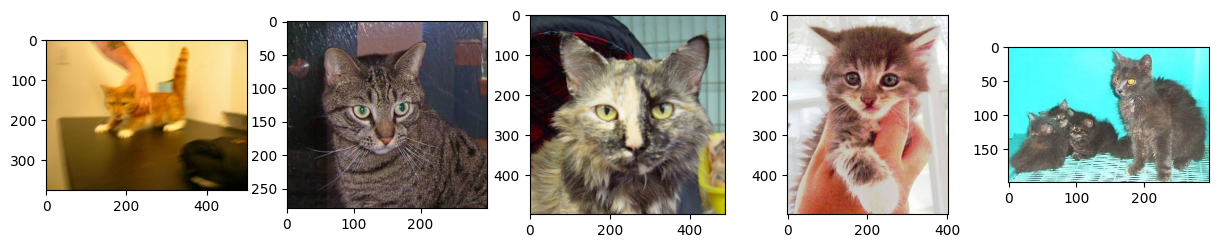

In [13]:
plt.figure(figsize=(15, 15))

folder = './datasetpg/gatos'
images = os.listdir(folder)

for i, img_name in enumerate(images[:5]):
  plt.subplot (5, 5, i + 1)
  image = mpimg.imread(folder + "/" + img_name)
  plt.imshow(image)

# Se aumentan los datos

In [14]:
# Aumento de datos con ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# generador de datasets
datagen = ImageDataGenerator(
    rescale= 1. / 255,
    rotation_range= 30,
    width_shift_range= 0.25,
    height_shift_range= 0.25,
    shear_range= 15,
    zoom_range= [0.5, 1.5],
    validation_split=0.2
)

data_gen_train = datagen.flow_from_directory('./datasetpg',
                                             target_size=(224, 224),
                                             batch_size=32,
                                             shuffle=True,
                                             subset='training'
)
data_gen_test = datagen.flow_from_directory('./datasetpg',
                                             target_size=(224, 224),
                                             batch_size=32,
                                             shuffle=True,
                                             subset='validation'
)

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


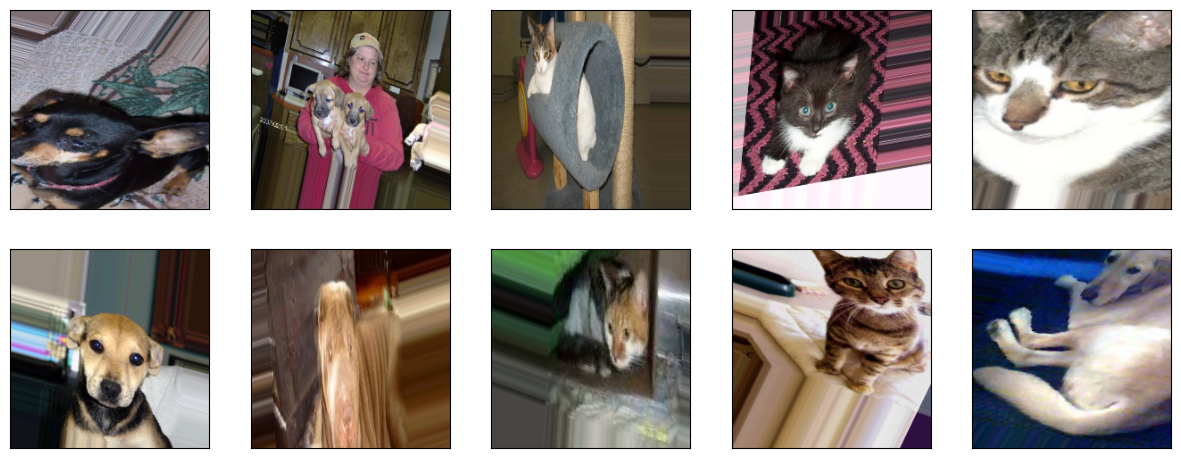

In [15]:
plt.figure(figsize=(15, 15))

for image, label in data_gen_train:
  for i in range(10):
    plt.subplot (5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[i])
  break
plt.show()

# Se buscan modelos de clasificación en Tensor Flow

In [16]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

mobilenet_v2 = hub.KerasLayer(url, input_shape=(224, 224, 3))     # Prestar atención al tamaño de la imagen 224 x 224

# Congelamos el modelo.
mobilenet_v2.trainable = False

# Se agrega la capa de NN, uniéndola a CNN que descargamos

In [17]:
from keras import models, layers

model = models.Sequential ([
    mobilenet_v2,
    layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


# Se compila el modelo

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Se entrena

In [19]:
epochs = 3

history = model.fit(
    data_gen_train,
    epochs=epochs,
    batch_size=32,
    validation_data=data_gen_test
)

Epoch 1/3
10/10 [==============================] - 15s 1s/step - loss: 0.9755 - accuracy: 0.5875 - val_loss: 0.4773 - val_accuracy: 0.8000
Epoch 2/3
10/10 [==============================] - 11s 1s/step - loss: 0.2848 - accuracy: 0.8719 - val_loss: 0.2537 - val_accuracy: 0.9125
Epoch 3/3
10/10 [==============================] - 11s 1s/step - loss: 0.2405 - accuracy: 0.8906 - val_loss: 0.2903 - val_accuracy: 0.9125


# Se grafica

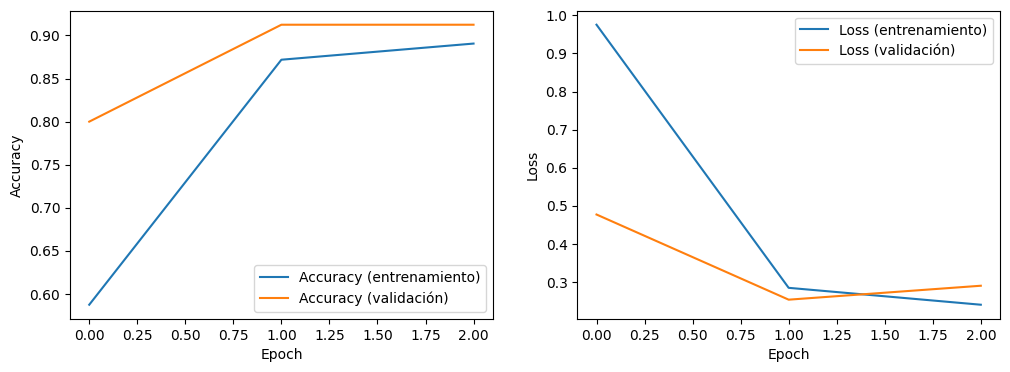

In [20]:
# Gráfica accuracy y loss durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validación)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (entrenamiento)')
plt.plot(history.history['val_loss'], label='Loss (validación)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Función de Predicción

In [21]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorize(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  img = np.array(img).astype(float) / 255
  img = cv2.resize(img, (224, 224))
  prediction = model.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediction[0], axis=-1)

# Se definen las clases

In [22]:
class_indices_train = data_gen_train.class_indices
class_indices_test = data_gen_test.class_indices

print("Índices de las clases en el conjunto de entrenamiento:", class_indices_train)
print("Índices de las clases en el conjunto de prueba:", class_indices_test)

Índices de las clases en el conjunto de entrenamiento: {'gatos': 0, 'perros': 1}
Índices de las clases en el conjunto de prueba: {'gatos': 0, 'perros': 1}


# Se predice con la URL de imágenes

In [23]:
# Perro: 1
url = 'https://i.blogs.es/808765/dpoty-puppy-2nd--c--tracy-kirby-the-kennel-club-2/450_1000.jpg'
prediction = categorize(url)
print(prediction)

# Gato: 0
url = 'https://s1.eestatic.com/2023/03/10/curiosidades/mascotas/747436034_231551832_1706x1280.jpg'
prediction = categorize(url)
print(prediction)

# Predecir y Averiguar
url = 'https://estaticos-cdn.prensaiberica.es/clip/823f515c-8143-4044-8f13-85ea1ef58f3a_16-9-discover-aspect-ratio_default_0.jpg'
prediction = categorize(url)
print(prediction)

# Predecir y Averiguar
url = 'https://www.lavanguardia.com/files/image_948_465/uploads/2021/12/09/61b224feec6bc.jpeg'
prediction = categorize(url)
print(prediction)

1/1 [==============================] - 0s 363ms/step
1
1/1 [==============================] - 0s 38ms/step
0
1/1 [==============================] - 0s 34ms/step
1
1/1 [==============================] - 0s 33ms/step
0
